RFM(Recency, Frequency, Monetary)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
import warnings

In [3]:
warnings.filterwarnings("ignore")
df = pd.read_excel("Online Retail.xlsx") ## reading

In [4]:
df.shape ## size dataset

(541909, 8)

# Data preprocessing 

In [5]:
data = df

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
data.loc[(df.UnitPrice<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [9]:
data.loc[(data.Quantity<0)][:5] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [11]:
data.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [12]:
data = data[pd.notnull(data['CustomerID'])]

In [13]:
data = data[data.Quantity > 0]

In [14]:
data = data[data.UnitPrice > 0]

In [15]:
data.isnull().mean()

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [16]:
filtered_data = data[['Country','CustomerID']].drop_duplicates()

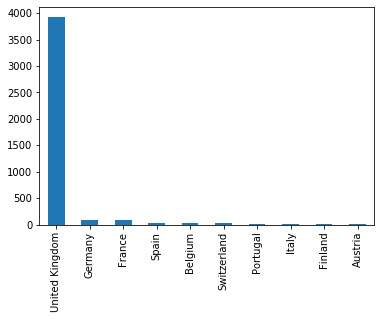

In [17]:
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [33]:
uk_data=data[data.Country=='United Kingdom']

In [34]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      354321 non-null object
StockCode      354321 non-null object
Description    354321 non-null object
Quantity       354321 non-null int64
InvoiceDate    354321 non-null datetime64[ns]
UnitPrice      354321 non-null float64
CustomerID     354321 non-null float64
Country        354321 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [35]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,354321.000000,354321.000000,354321.000000
mean,12.013795,2.963994,15552.486392
std,189.267956,17.862655,1594.527150
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [36]:
uk_data = uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [37]:
uk_data['Price'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [38]:
print('Range {} to {}'.format(uk_data['InvoiceDate'].min(),
                                    uk_data['InvoiceDate'].max()))

Range 2010-12-01 08:26:00 to 2011-12-09 12:49:00


In [39]:
import datetime as dt
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [40]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Price
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [42]:
rfm_table = uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Price': lambda price: price.sum()})

In [43]:
rfm_table.columns

Index(['InvoiceDate', 'InvoiceNo', 'Price'], dtype='object')

In [44]:
rfm_table.columns=['monetary','frequency','recency']

In [45]:
rfm_table['recency'] = rfm_table['recency'].astype(int)
rfm_table['frequency'] = rfm_table['frequency'].astype(int)
rfm_table['recency'] = rfm_table['recency'].astype(int)

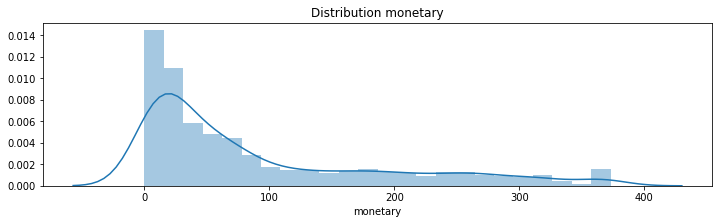

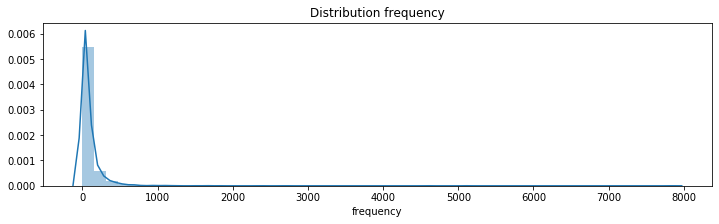

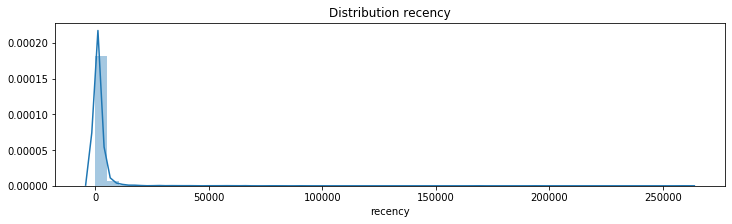

In [46]:
a = ['monetary','frequency','recency']
for col in a:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(rfm_table[col])
    ax.set_title('Distribution %s' % col)
    plt.show()

In [47]:
rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, [1, 2, 3, 4])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, [4, 3, 2, 1])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, [4, 3, 2, 1])
rfm_table.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183,4,4,1
12747.0,2,103,4196,4,1,4
12748.0,0,4595,33719,4,1,4
12749.0,3,199,4090,4,1,4
12820.0,3,59,942,3,2,4


In [48]:
rfm = rfm_table 

In [49]:
rfm['RFM_Score'] = round(rfm[['r_quartile','f_quartile','m_quartile']].sum(axis=1) / 3, 1)
rfm.head()


,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183,4,4,1,3.0
12747.0,2,103,4196,4,1,4,3.0
12748.0,0,4595,33719,4,1,4,3.0
12749.0,3,199,4090,4,1,4,3.0
12820.0,3,59,942,3,2,4,3.0


In [50]:
rfm["RFM_Score"].unique()

array([3. , 2. , 2.3, 3.3, 2.7, 1.7, 3.7, 1.3, 4. ])

In [51]:
print("very high customers: ",len(rfm[rfm['RFM_Score'] < 2]))
print("high customers",len(rfm[(rfm['RFM_Score'] >= 2) & (rfm['RFM_Score'] < 3)]))
print("medium customers",len(rfm[(rfm['RFM_Score'] >= 3) & (rfm['RFM_Score'] < 4)]))
print("lost customers",len(rfm[rfm['RFM_Score'] == 4]))

very high customers:  231
high customers 2626
medium customers 1058
lost customers 5


In [52]:
rfm['Segment'] = 'very high customers'
rfm.loc[(rfm['RFM_Score'] >= 2) & (rfm['RFM_Score'] < 3), 'Segment'] = 'high customers'
rfm.loc[(rfm['RFM_Score'] >= 3) & (rfm['RFM_Score'] < 4), 'Segment'] = 'medium customers'
rfm.loc[rfm['RFM_Score'] == 4, 'Segment'] = 'lost customers'

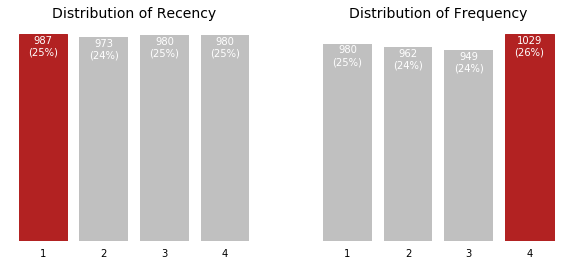

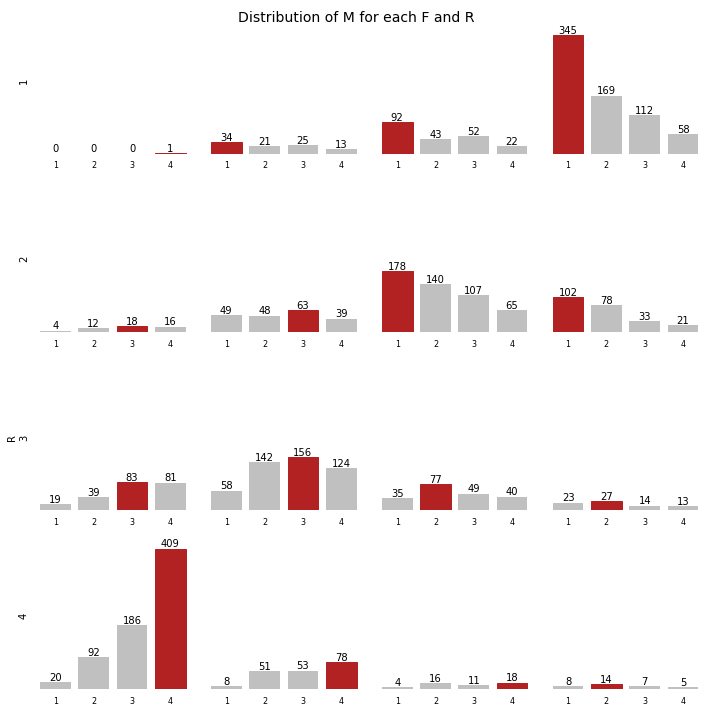

In [53]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['r_quartile', 'f_quartile']):
    parameters = {'r_quartile':'Recency', 'f_quartile':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
        
plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=4, ncols=4,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 5)
f_range = range(1, 5)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['r_quartile'] == r) & (rfm['f_quartile'] == f)]['m_quartile'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

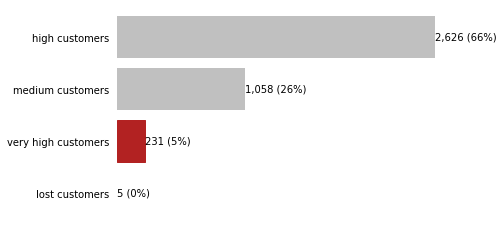

In [54]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['very high customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [57]:
rfm_table.drop(columns=['Segment'], inplace=True)

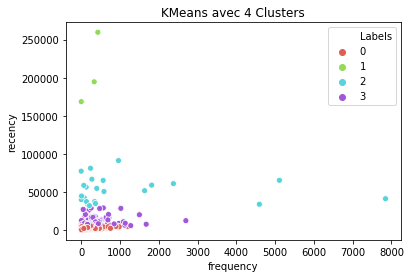

In [58]:
## K-means

# 4 cluster
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4).fit(rfm_table)

rfm_table['Labels'] = km.labels_
#plt.figure(figsize=(12, 8))
sns.scatterplot(rfm_table['frequency'], rfm_table['recency'], hue=rfm_table['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans avec 4 Clusters')
plt.show()